In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Get the dataset

In [7]:
column_names=['user_id','item_id','rating','timestamp']
df = pd.read_csv('D:/u.data',sep='\t',names=column_names)

In [8]:
df

user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]

In [9]:
df.shape

(100000, 4)

In [10]:
df['user_id'].nunique()

943

In [11]:
df['item_id'].nunique()

1682

In [16]:
movie_titles=pd.read_csv("D:/u.item",sep="\|",header=None)

In [17]:
movie_titles.shape

(1682, 24)

In [20]:
movie_titles=movie_titles[[0,1]]

In [21]:
movie_titles.columns=['item_id','Name']

In [22]:
movie_titles

item_id                                       Name
0           1                           Toy Story (1995)
1           2                           GoldenEye (1995)
2           3                          Four Rooms (1995)
3           4                          Get Shorty (1995)
4           5                             Copycat (1995)
...       ...                                        ...
1677     1678                          Mat' i syn (1997)
1678     1679                           B. Monkey (1998)
1679     1680                       Sliding Doors (1998)
1680     1681                        You So Crazy (1994)
1681     1682  Scream of Stone (Schrei aus Stein) (1991)

[1682 rows x 2 columns]

In [23]:
df = pd.merge(df,movie_titles,on='item_id')

In [24]:
df

user_id  item_id  rating  timestamp  \
0          196      242       3  881250949   
1           63      242       3  875747190   
2          226      242       5  883888671   
3          154      242       3  879138235   
4          306      242       5  876503793   
...        ...      ...     ...        ...   
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                    Name  
0                                           Kolya (1996)  
1                                           Kolya (1996)  
2                                           Kolya (1996)  
3                                           Kolya (1996)  
4                                           Kolya (1996)  
...                                                  ...  
99995                                  Mamma Roma (1962)  
99996                             Eighth Day, The (1996)  
99997                                  Girls Town (1996)  
99998  Silence of the Palace, The (Saimt el Qusur) (1...  
99999                                    Dadetown (1995)  

[100000 rows x 5 columns]

## Explaratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df

user_id  item_id  rating  timestamp  \
0          196      242       3  881250949   
1           63      242       3  875747190   
2          226      242       5  883888671   
3          154      242       3  879138235   
4          306      242       5  876503793   
...        ...      ...     ...        ...   
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                    Name  
0                                           Kolya (1996)  
1                                           Kolya (1996)  
2                                           Kolya (1996)  
3                                           Kolya (1996)  
4                                           Kolya (1996)  
...                                                  ...  
99995                                  Mamma Roma (1962)  
99996                             Eighth Day, The (1996)  
99997                                  Girls Town (1996)  
99998  Silence of the Palace, The (Saimt el Qusur) (1...  
99999                                    Dadetown (1995)  

[100000 rows x 5 columns]

In [32]:
df.groupby('Name').mean()['rating'].sort_values(ascending=False)

Name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [34]:
df.groupby('Name').count()['rating'].sort_values(ascending=False)

Name
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [35]:
df1 = pd.DataFrame(df.groupby('Name').mean()['rating'])

In [36]:
df1

rating
Name                                           
'Til There Was You (1997)              2.333333
1-900 (1994)                           2.600000
101 Dalmatians (1996)                  2.908257
12 Angry Men (1957)                    4.344000
187 (1997)                             3.024390
...                                         ...
Young Guns II (1990)                   2.772727
Young Poisoner's Handbook, The (1995)  3.341463
Zeus and Roxanne (1997)                2.166667
unknown                                3.444444
Á köldum klaka (Cold Fever) (1994)     3.000000

[1664 rows x 1 columns]

In [37]:
df1['Number of Ratings'] = df.groupby('Name').count()['rating']

In [38]:
df1

rating  Number of Ratings
Name                                                              
'Til There Was You (1997)              2.333333                  9
1-900 (1994)                           2.600000                  5
101 Dalmatians (1996)                  2.908257                109
12 Angry Men (1957)                    4.344000                125
187 (1997)                             3.024390                 41
...                                         ...                ...
Young Guns II (1990)                   2.772727                 44
Young Poisoner's Handbook, The (1995)  3.341463                 41
Zeus and Roxanne (1997)                2.166667                  6
unknown                                3.444444                  9
Á köldum klaka (Cold Fever) (1994)     3.000000                  1

[1664 rows x 2 columns]

In [39]:
df1.sort_values(by='Number of Ratings',ascending=False)

rating  Number of Ratings
Name                                                           
Star Wars (1977)                    4.358491                583
Contact (1997)                      3.803536                509
Fargo (1996)                        4.155512                508
Return of the Jedi (1983)           4.007890                507
Liar Liar (1997)                    3.156701                485
...                                      ...                ...
Great Day in Harlem, A (1994)       5.000000                  1
Other Voices, Other Rooms (1997)    3.000000                  1
Good Morning (1971)                 1.000000                  1
Girls Town (1996)                   3.000000                  1
Á köldum klaka (Cold Fever) (1994)  3.000000                  1

[1664 rows x 2 columns]

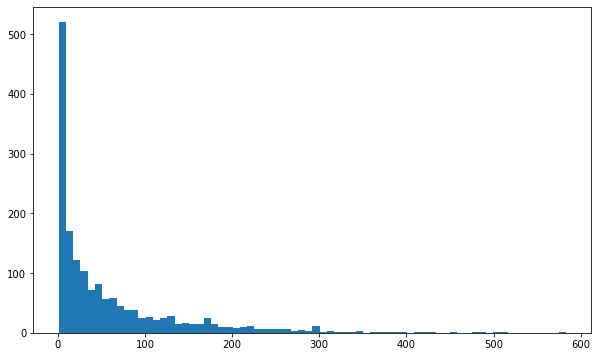

In [44]:
plt.figure(figsize=(10,6))
plt.hist(df1['Number of Ratings'],bins = 70)
plt.show()

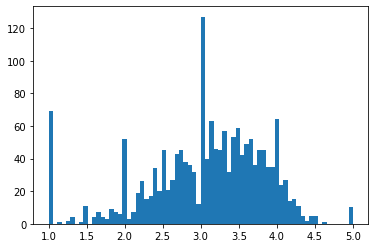

In [45]:
plt.hist(df1['rating'],bins=70)
plt.show()

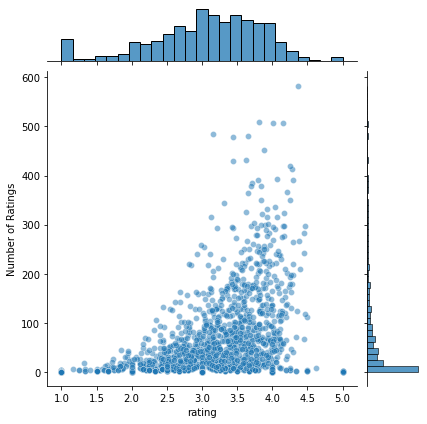

In [48]:
sns.jointplot(x=df1['rating'],y=df1['Number of Ratings'],data=df1,alpha=0.5)

In [49]:
df.head()

user_id  item_id  rating  timestamp          Name
0      196      242       3  881250949  Kolya (1996)
1       63      242       3  875747190  Kolya (1996)
2      226      242       5  883888671  Kolya (1996)
3      154      242       3  879138235  Kolya (1996)
4      306      242       5  876503793  Kolya (1996)

In [54]:
moviemat=df.pivot_table(index='user_id',columns='Name',values='rating')

In [55]:
moviemat

Name     'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

Name     12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   
...                      ...         ...                          ...   
939                      NaN         NaN                          NaN   
940                      NaN         NaN                          NaN   
941                      NaN         NaN                          NaN   
942                      NaN         NaN                          NaN   
943                      NaN         NaN                          2.0   

Name     20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   
...                                      ...                           ...   
939                                      NaN                           NaN   
940                                      NaN                           NaN   
941                                      NaN                           NaN   
942                                      NaN                           3.0   
943                                      NaN                           NaN   

Name     3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   
...                                              ...                   ...   
939                                              NaN                   NaN   
940                                              NaN                   NaN   
941                                              NaN                   NaN   
942                                              NaN                   3.0   
943                                              NaN                   NaN   

Name     ...  Yankee Zulu (1994)  Year of th

In [56]:
star_wars_user_ratings = moviemat['Star Wars (1977)']

In [57]:
star_wars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [58]:
similar_to_starwars = moviemat.corrwith(star_wars_user_ratings)

In [60]:
similar_to_starwars

Name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [62]:
corr_with_starwars= pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [64]:
corr_with_starwars.dropna(inplace=True)

In [65]:
corr_with_starwars

Correlation
Name                                              
'Til There Was You (1997)                 0.872872
1-900 (1994)                             -0.645497
101 Dalmatians (1996)                     0.211132
12 Angry Men (1957)                       0.184289
187 (1997)                                0.027398
...                                            ...
Young Guns (1988)                         0.186377
Young Guns II (1990)                      0.228615
Young Poisoner's Handbook, The (1995)    -0.007374
Zeus and Roxanne (1997)                   0.818182
unknown                                   0.723123

[1410 rows x 1 columns]

In [66]:
corr_with_starwars.sort_values(by=['Correlation'],ascending=False)

Correlation
Name                                               
Hollow Reed (1996)                              1.0
Commandments (1997)                             1.0
Cosi (1996)                                     1.0
No Escape (1994)                                1.0
Stripes (1981)                                  1.0
...                                             ...
Roseanna's Grave (For Roseanna) (1997)         -1.0
For Ever Mozart (1996)                         -1.0
American Dream (1990)                          -1.0
Frankie Starlight (1995)                       -1.0
Fille seule, La (A Single Girl) (1995)         -1.0

[1410 rows x 1 columns]

In [67]:
corr_with_starwars = corr_with_starwars.join(df1['Number of Ratings'])

In [68]:
corr_with_starwars

Correlation  Number of Ratings
Name                                                                 
'Til There Was You (1997)                 0.872872                  9
1-900 (1994)                             -0.645497                  5
101 Dalmatians (1996)                     0.211132                109
12 Angry Men (1957)                       0.184289                125
187 (1997)                                0.027398                 41
...                                            ...                ...
Young Guns (1988)                         0.186377                101
Young Guns II (1990)                      0.228615                 44
Young Poisoner's Handbook, The (1995)    -0.007374                 41
Zeus and Roxanne (1997)                   0.818182                  6
unknown                                   0.723123                  9

[1410 rows x 2 columns]

In [73]:
corr_with_starwars[corr_with_starwars['Number of Ratings']>100].sort_values(by='Correlation',ascending=False)

Correlation  \
Name                                                              
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.747981   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   
...                                                         ...   
Edge, The (1997)                                      -0.127167   
As Good As It Gets (1997)                             -0.130466   
Crash (1996)                                          -0.148507   
G.I. Jane (1997)                                      -0.176734   
First Wives Club, The (1996)                          -0.194496   

                                                    Number of Ratings  
Name                                                                   
Star Wars (1977)                                                  583  
Empire Strikes Back, The (1980)                                   367  
Return of the Jedi (1983)                                         507  
Raiders of the Lost Ark (1981)                                    420  
Austin Powers: International Man of Mystery (1997)                130  
...                                                               ...  
Edge, The (1997)                                                  113  
As Good As It Gets (1997)                                         112  
Crash (1996)                                                      128  
G.I. Jane (1997)                                                  175  
First Wives Club, The (1996)                                      160  

[334 rows x 2 columns]

## Predict Function

In [74]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(df1['Number of Ratings'])
    predictions = corr_movie[corr_movie['Number of Ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions

In [76]:
predictions= predict_movies("Titanic (1997)")

In [78]:
predictions.head()

Correlation  Number of Ratings
Name                                                        
Titanic (1997)                   1.000000                350
River Wild, The (1994)           0.497600                146
Abyss, The (1989)                0.472103                151
Bram Stoker's Dracula (1992)     0.443560                120
True Lies (1994)                 0.435104                208

In [ ]:
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)